In [99]:
import tensorflow as tf 
import numpy as np

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [101]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'training set {X_train.shape} \ntraining labels {X_train.shape} \ntest set {X_test.shape} \ntest labels {X_test.shape} \n')

training set (60000, 28, 28) 
training labels (60000, 28, 28) 
test set (10000, 28, 28) 
test labels (10000, 28, 28) 



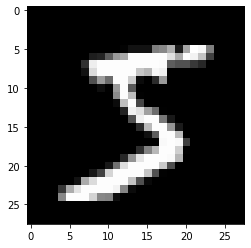

In [102]:
image = X_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [103]:
#Lets scale the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [141]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [142]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [143]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(0.001), metrics=[SparseCategoricalAccuracy()])

In [144]:
H = model.fit(X_train, y_train,
                validation_data=(X_test,y_test),
                epochs=8,
                batch_size=128)

Epoch 1/8
469/469 [==============================] - 1s 3ms/step - loss: 0.3516 - sparse_categorical_accuracy: 0.9036 - val_loss: 0.1924 - val_sparse_categorical_accuracy: 0.9460
Epoch 2/8
469/469 [==============================] - 1s 3ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.1410 - val_sparse_categorical_accuracy: 0.9591
Epoch 3/8
469/469 [==============================] - 1s 3ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.1076 - val_sparse_categorical_accuracy: 0.9680
Epoch 4/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.0956 - val_sparse_categorical_accuracy: 0.9720
Epoch 5/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0864 - val_sparse_categorical_accuracy: 0.9740
Epoch 6/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0611 - sparse_categorical_accu

In [145]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test, batch_size=128)

In [146]:
print(classification_report(y_test, 
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in range(0, 10)]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [147]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 97.63000011444092


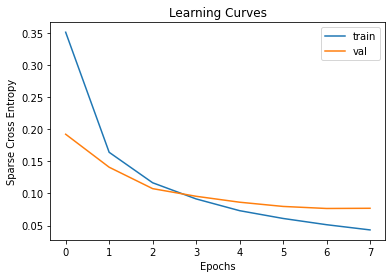

In [148]:
# ploting the learning curves
import matplotlib.pyplot as plt

plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Sparse Cross Entropy')
plt.plot(H.history['loss'], label='train')
plt.plot(H.history['val_loss'], label='val')
plt.legend()
plt.show()

10


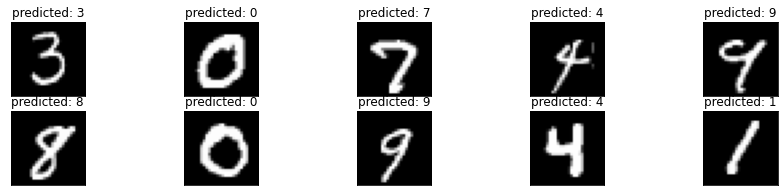

In [139]:
# Lets test on some random image
images = X_train[50:60]
images_label = y_train[50:60]
print(len(images))
# lets display the image which we want to predict
def show_plots(images, images_label):
    fig = plt.figure(figsize=(15,3))
    for i in range(len(images)):
        ax = fig.add_subplot(2,5, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[i]), cmap='gray')
        ax.set_title(f'predicted: {images_label[i]}')
    plt.show()
show_plots(images, images_label)

In [125]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1, 784)
# predicting the label of image
yhat = model.predict(image)
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 3


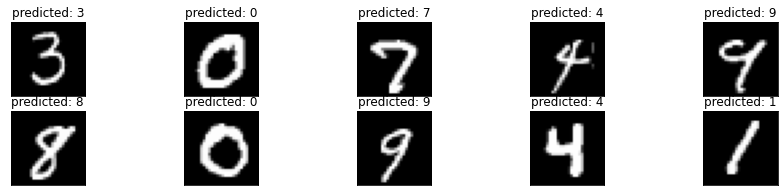

In [140]:
test_predictions = []
for image in images:
    image = image.reshape(1, 784)
    # predicting the label of image
    yhat = model.predict(image)
    preds = np.argmax(yhat)
    test_predictions.append(preds)
  
show_plots(images, test_predictions)

In [ ]:
# lets improve via cnn